In [1]:
import pandas as pd
import csv

# dataset 불러오기
df_test = pd.read_csv('./data/act_test.csv')
df_train = pd.read_csv('./data/act_train.csv')
df_people = pd.read_csv('./data/people.csv')
df_sample = pd.read_csv('./data/sample_submission.csv')

# train dataset의 column name들을 바꿔주기. 이후에 df_people과 merge를 하는 과정에서
# column name이 중복되는 것을 방지하기 위해서.
df_train_rename = df_train.rename(columns={'char_1':'act_char_1', 
                                           'char_2':'act_char_2',
                                           'char_3':'act_char_3', 
                                           'char_4':'act_char_4',
                                           'char_5':'act_char_5',
                                           'char_6':'act_char_6',
                                           'char_7':'act_char_7',
                                           'char_8':'act_char_8',
                                           'char_9':'act_char_9',
                                           'char_10':'act_char_10',
                                           })

# date column에서 int 형식만 남기는 작업
def datetime_str_converter(data):
    
    datetime = list(data['date'])
    year_list, month_list, day_list = [], [], []
    for item in datetime:
        year_list.append(item[:4])
        month_list.append(item[5:7])
        day_list.append(item[8:10])

    return year_list, month_list, day_list

# train dataset에 함수 적용
year_list, month_list, day_list = datetime_str_converter(df_train_rename)
date_list = []
for year, month, day in zip(year_list, month_list, day_list):
    date_list.append(int(year + month + day))
    
df_train_rename['act_date'] = date_list
del df_train_rename['date']

# people dataset에 함수 적용
year_list1, month_list1, day_list1 = datetime_str_converter(df_people)
date_list1 = []
for year, month, day in zip(year_list1, month_list1, day_list1):
    date_list1.append(int(year + month + day))
    
df_people['people_date'] = date_list1
del df_people['date']

# train 과 people dataset merge
df = pd.merge(left=df_train_rename, right=df_people, how='left', on='people_id')
df

people_id   activity_id activity_category act_char_1 act_char_2  \
0           ppl_100  act2_1734928            type 4        NaN        NaN   
1           ppl_100  act2_2434093            type 2        NaN        NaN   
2           ppl_100  act2_3404049            type 2        NaN        NaN   
3           ppl_100  act2_3651215            type 2        NaN        NaN   
4           ppl_100  act2_4109017            type 2        NaN        NaN   
5           ppl_100   act2_898576            type 4        NaN        NaN   
6        ppl_100002  act2_1233489            type 2        NaN        NaN   
7        ppl_100002  act2_1623405            type 2        NaN        NaN   
8        ppl_100003  act2_1111598            type 2        NaN        NaN   
9        ppl_100003  act2_1177453            type 2        NaN        NaN   
10       ppl_100003   act2_133509            type 4        NaN        NaN   
11       ppl_100003  act2_1408475            type 4        NaN        NaN   
12       ppl_100003  act2_1610829            type 2        NaN        NaN   
13       ppl_100003  act2_1688731            type 4        NaN        NaN   
14       ppl_100003  act2_1961720            type 4        NaN        NaN   
15       ppl_100003  act2_1988351            type 2        NaN        NaN   
16       ppl_100003  act2_2198176            type 2        NaN        NaN   
17       ppl_100003  act2_2437661            type 2        NaN        NaN   
18       ppl_100003  act2_2476911            type 2        NaN        NaN   
19       ppl_100003  act2_2557270            type 4        NaN        NaN   
20       ppl_100003  act2_2581989            type 2        NaN        NaN   
21       ppl_100003  act2_3116385            type 2        NaN        NaN   
22       ppl_100003  act2_3159712            type 2        NaN        NaN   
23       ppl_100003  act2_3292005            type 2        NaN        NaN   
24       ppl_100003  act2_3461867            type 2        NaN        NaN   
25       ppl_100003  act2_3468306            type 4        NaN        NaN   
26       ppl_100003  act2_3867292            type 2        NaN        NaN   
27       ppl_100003  act2_3990676            type 4        NaN        NaN   
28       ppl_100003  act2_4102292            type 2        NaN        NaN   
29       ppl_100003  act2_4160587            type 2        NaN        NaN   
...             ...           ...               ...        ...        ...   
2197261   ppl_99994  act2_2053669            type 2        NaN        NaN   
2197262   ppl_99994  act2_2053762            type 4        NaN        NaN   
2197263   ppl_99994  act2_2134893            type 4        NaN        NaN   
2197264   ppl_99994  act2_2139237            type 2        NaN        NaN   
2197265   ppl_99994  act2_2233766            type 2        NaN        NaN   
2197266   ppl_99994  act2_2499779            type 3        NaN        NaN   
2197267   ppl_99994  act2_2514377            type 2        NaN        NaN   
2197268   ppl_99994  act2_2537795            type 2        NaN        NaN   
2197269   ppl_99994  act2_2582736            type 2        NaN        NaN   
2197270   ppl_99994  act2_2674371            type 2        NaN        NaN   
2197271   ppl_99994  act2_2808953            type 2        NaN        NaN   
2197272   ppl_99994  act2_2840212            type 4        NaN        NaN   
2197273   ppl_99994  act2_2992386            type 4        NaN        NaN   
2197274   ppl_99994  act2_3177773            type 4        NaN        NaN   
2197275   ppl_99994  act2_3284072            type 2        NaN        NaN   
2197276   ppl_99994  act2_3373847            type 2        NaN        NaN   
2197277   ppl_99994  act2_3534467            type 2        NaN        NaN   
2197278   ppl_99994  act2_3903321            type 4        NaN        NaN   
2197279   ppl_99994  act2_4024188            type 4        NaN        NaN   
2197280   ppl_99994  act2_4355021            type 4        NaN        NaN   
219728

In [2]:
# feature 들을 한눈에 보기 위한 작업
pd.set_option('display.max_columns', 55)
pd.set_option('display.max_rows', 1000)

In [3]:
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
df = df.fillna(value='NaN')
# df.isnull().sum()

In [8]:
df

people_id   activity_id activity_category act_char_1 act_char_2  \
0           ppl_100  act2_1734928            type 4        NaN        NaN   
1           ppl_100  act2_2434093            type 2        NaN        NaN   
2           ppl_100  act2_3404049            type 2        NaN        NaN   
3           ppl_100  act2_3651215            type 2        NaN        NaN   
4           ppl_100  act2_4109017            type 2        NaN        NaN   
5           ppl_100   act2_898576            type 4        NaN        NaN   
6        ppl_100002  act2_1233489            type 2        NaN        NaN   
7        ppl_100002  act2_1623405            type 2        NaN        NaN   
8        ppl_100003  act2_1111598            type 2        NaN        NaN   
9        ppl_100003  act2_1177453            type 2        NaN        NaN   
10       ppl_100003   act2_133509            type 4        NaN        NaN   
11       ppl_100003  act2_1408475            type 4        NaN        NaN   
12       ppl_100003  act2_1610829            type 2        NaN        NaN   
13       ppl_100003  act2_1688731            type 4        NaN        NaN   
14       ppl_100003  act2_1961720            type 4        NaN        NaN   
15       ppl_100003  act2_1988351            type 2        NaN        NaN   
16       ppl_100003  act2_2198176            type 2        NaN        NaN   
17       ppl_100003  act2_2437661            type 2        NaN        NaN   
18       ppl_100003  act2_2476911            type 2        NaN        NaN   
19       ppl_100003  act2_2557270            type 4        NaN        NaN   
20       ppl_100003  act2_2581989            type 2        NaN        NaN   
21       ppl_100003  act2_3116385            type 2        NaN        NaN   
22       ppl_100003  act2_3159712            type 2        NaN        NaN   
23       ppl_100003  act2_3292005            type 2        NaN        NaN   
24       ppl_100003  act2_3461867            type 2        NaN        NaN   
25       ppl_100003  act2_3468306            type 4        NaN        NaN   
26       ppl_100003  act2_3867292            type 2        NaN        NaN   
27       ppl_100003  act2_3990676            type 4        NaN        NaN   
28       ppl_100003  act2_4102292            type 2        NaN        NaN   
29       ppl_100003  act2_4160587            type 2        NaN        NaN   
30       ppl_100003  act2_4392666            type 2        NaN        NaN   
31       ppl_100003  act2_4438110            type 2        NaN        NaN   
32       ppl_100003  act2_4511875            type 2        NaN        NaN   
33       ppl_100003  act2_4568041            type 2        NaN        NaN   
34       ppl_100003  act2_4582681            type 2        NaN        NaN   
35       ppl_100003  act2_4665065            type 2        NaN        NaN   
36       ppl_100003  act2_4808411            type 4        NaN        NaN   
37       ppl_100003   act2_666224            type 4        NaN        NaN   
38       ppl_100003     act2_6962            type 4        NaN        NaN   
39       ppl_100003   act2_787846            type 2        NaN        NaN   
40       ppl_100003    act2_79633            type 4        NaN        NaN   
41       ppl_100003   act2_992474            type 2        NaN        NaN   
42       ppl_100006  act2_2358115            type 4        NaN        NaN   
43       ppl_100006  act2_2380649            type 3        NaN        NaN   
44       ppl_100006   act2_632935            type 4        NaN        NaN   
45       ppl_100013  act2_1667803            type 5        NaN        NaN   
46       ppl_100013     act2_2229            type 5        NaN        NaN   
47       ppl_100013   act2_225752            type 5        NaN        NaN   
48       ppl_100013  act2_2601949            type 5        NaN        NaN   
49       ppl_100013  act2_3059098            type 5        NaN        NaN   
50       ppl_100019  act2_1681678            type 3        NaN        NaN   
51    

In [3]:
# df.to_csv('df.csv')

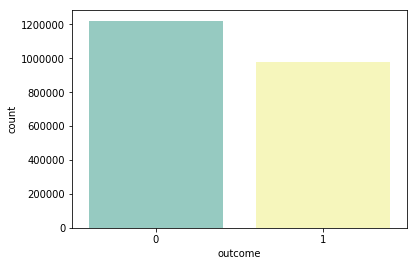

In [6]:
sns.countplot(df.outcome, palette='Set3')
plt.show()

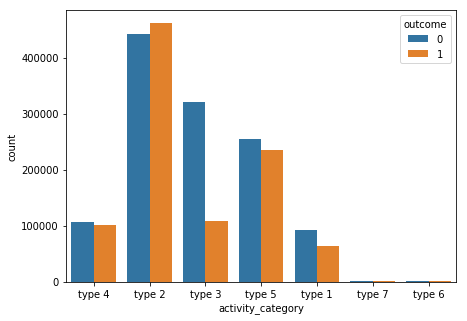

In [7]:
plt.figure(figsize = (7, 5))
sns.countplot(x = 'activity_category', hue = 'outcome', data = df)
plt.show()

### activity type 과 관련해서는 4, 2, 7, 6 은 유의미한 차이가 보이지 않고, 3의 경우 유의미한 차이가 있는 것으로 보인다. 

In [ ]:
sns.countplot()

In [9]:
df_people

people_id  char_1      group_1  char_2   char_3   char_4  char_5  \
0          ppl_100  type 2  group 17304  type 2   type 5   type 5  type 5   
1       ppl_100002  type 2   group 8688  type 3  type 28   type 9  type 5   
2       ppl_100003  type 2  group 33592  type 3   type 4   type 8  type 5   
3       ppl_100004  type 2  group 22593  type 3  type 40  type 25  type 9   
4       ppl_100006  type 2   group 6534  type 3  type 40  type 25  type 9   
5        ppl_10001  type 2  group 25417  type 3   type 6   type 6  type 4   
6       ppl_100010  type 2  group 17304  type 2   type 8   type 7  type 8   
7       ppl_100013  type 2   group 4204  type 3   type 4   type 8  type 4   
8       ppl_100019  type 2  group 45749  type 3  type 40  type 25  type 9   
9       ppl_100025  type 2  group 36096  type 3  type 14   type 6  type 8   
10      ppl_100028  type 2  group 17304  type 2  type 40  type 25  type 9   
11      ppl_100029  type 2  group 17304  type 2   type 4   type 6  type 4   
12      ppl_100032  type 2  group 18035  type 3   type 7   type 6  type 7   
13      ppl_100033  type 2  group 17304  type 2  type 10   type 7  type 6   
14      ppl_100035  type 2   group 9439  type 3   type 4  type 10  type 4   
15      ppl_100040  type 2  group 19662  type 3   type 5   type 5  type 5   
16      ppl_100042  type 2   group 7636  type 3  type 40  type 25  type 9   
17      ppl_100043  type 2  group 39166  type 3   type 6   type 6  type 4   
18      ppl_100045  type 2  group 17304  type 2  type 40  type 25  type 9   
19      ppl_100047  type 2  group 17304  type 2  type 40  type 25  type 9   
20      ppl_100048  type 1   group 2103  type 1   type 1   type 1  type 1   
21      ppl_100049  type 2   group 9405  type 3   type 4  type 12  type 4   
22       ppl_10005  type 2  group 17304  type 2  type 40  type 25  type 9   
23      ppl_100050  type 2   group 7256  type 3  type 40  type 25  type 9   
24      ppl_100051  type 1  group 10874  type 1   type 1   type 1  type 1   
25      ppl_100052  type 2  group 17304  type 2   type 4   type 2  type 4   
26      ppl_100058  type 2  group 42007  type 3  type 10   type 6  type 6   
27       ppl_10006  type 2    group 627  type 3  type 40  type 25  type 9   
28      ppl_100060  type 2  group 17304  type 2  type 11   type 2  type 2   
29      ppl_100062  type 1     group 49  type 1   type 1   type 1  type 1   
30      ppl_100063  type 2  group 24280  type 3   type 2   type 6  type 2   
31      ppl_100064  type 2  group 17304  type 2   type 9   type 6  type 6   
32      ppl_100066  type 2  group 17304  type 2   type 5   type 8  type 5   
33      ppl_100069  type 2   group 5693  type 3   type 8   type 6  type 8   
34       ppl_10007  type 2  group 48070  type 3   type 4   type 3  type 4   
35      ppl_100070  type 2  group 17304  type 2   type 6   type 6  type 8   
36      ppl_100071  type 2  group 17304  type 2  type 40  type 25  type 9   
37      ppl_100072  type 2   group 1102  type 3   type 4   type 2  type 4   
38      ppl_100073  type 2   group 6826  type 3   type 5   type 5  type 5   
39      ppl_100075  type 1    group 678  type 1   type 2   type 7  type 2   
40      ppl_100078  type 2  group 18441  type 3  type 40  type 25  type 9   
41      ppl_100079  type 2  group 14038  type 3  type 40  type 25  type 9   
42      ppl_100080  type 2  group 17304  type 2  type 11   type 3  type 2   
43      ppl_100081  type 2    group 667  type 3   type 4   type 4  type 4   
44      ppl_100083  type 2  group 31187  type 3  type 14   type 6  type 8   
45      ppl_100084  type 2  group 18442  type 3  type 40  type 25  type 9   
46      ppl_100087  type 2  group 17304  type 2   type 5   type 5  type 5   
47      ppl_100090  type 2  group 37488  type 3  type 14   type 9  type 5   
48      ppl_100092  type 2  group 17304  type 2  type 40  type 25  type 9   
49      ppl_100095  type 2  group 17304  type 2  type 40  type 25  type 9   
50      ppl_100099  type 2  group 17304  type 2   type 5   type 5  type 5   
51   

In [ ]:
plt.figure(figsize = (7, 5))
sns.countplot(x = 'activity_category', hue = 'outcome', data = df)
plt.show()

In [10]:
df_test

people_id   activity_id        date activity_category   char_1  \
0       ppl_100004   act1_249281  2022-07-20            type 1   type 5   
1       ppl_100004   act2_230855  2022-07-20            type 5      NaN   
2        ppl_10001   act1_240724  2022-10-14            type 1  type 12   
3        ppl_10001    act1_83552  2022-11-27            type 1  type 20   
4        ppl_10001  act2_1043301  2022-10-15            type 5      NaN   
5        ppl_10001   act2_112890  2022-11-27            type 5      NaN   
6        ppl_10001  act2_1169930  2022-10-15            type 5      NaN   
7        ppl_10001  act2_1924448  2022-10-15            type 5      NaN   
8        ppl_10001  act2_1953554  2022-10-15            type 5      NaN   
9        ppl_10001  act2_1971739  2022-11-28            type 5      NaN   
10       ppl_10001  act2_2839282  2022-10-16            type 5      NaN   
11       ppl_10001  act2_2889351  2022-11-27            type 5      NaN   
12       ppl_10001  act2_3238933  2022-10-15            type 5      NaN   
13       ppl_10001  act2_3384798  2022-10-15            type 5      NaN   
14       ppl_10001  act2_3701358  2022-11-27            type 5      NaN   
15       ppl_10001  act2_3715695  2022-10-15            type 5      NaN   
16       ppl_10001  act2_3734085  2022-11-27            type 5      NaN   
17       ppl_10001  act2_3961391  2022-10-16            type 5      NaN   
18       ppl_10001  act2_4167474  2022-10-15            type 5      NaN   
19       ppl_10001  act2_4397847  2022-10-15            type 5      NaN   
20       ppl_10001  act2_4649285  2022-10-15            type 5      NaN   
21       ppl_10001   act2_538607  2022-10-15            type 5      NaN   
22       ppl_10001   act2_584216  2022-11-27            type 5      NaN   
23       ppl_10001   act2_596561  2022-10-15            type 5      NaN   
24       ppl_10001   act2_649143  2022-11-27            type 5      NaN   
25       ppl_10001   act2_659237  2022-10-16            type 5      NaN   
26       ppl_10001   act2_688604  2022-11-28            type 5      NaN   
27      ppl_100010   act1_218751  2022-09-01            type 1   type 2   
28      ppl_100010   act1_383524  2022-09-01            type 1   type 2   
29      ppl_100010  act2_3973689  2022-09-01            type 3      NaN   
30      ppl_100010   act2_815825  2022-11-24            type 2      NaN   
31      ppl_100048   act1_238585  2023-07-05            type 1   type 5   
32      ppl_100048  act2_1309865  2022-10-22            type 4      NaN   
33      ppl_100048  act2_1403961  2023-03-30            type 4      NaN   
34      ppl_100048  act2_1418626  2023-02-15            type 4      NaN   
35      ppl_100048  act2_1452429  2023-03-30            type 4      NaN   
36      ppl_100048  act2_1488463  2023-03-30            type 4      NaN   
37      ppl_100048  act2_1769036  2023-06-15            type 4      NaN   
38      ppl_100048  act2_1823948  2022-11-04            type 4      NaN   
39      ppl_100048  act2_2140546  2023-02-15            type 2      NaN   
40      ppl_100048  act2_2237966  2022-10-22            type 4      NaN   
41      ppl_100048  act2_2407850  2023-06-15            type 2      NaN   
42      ppl_100048  act2_2556503  2022-11-04            type 2      NaN   
43      ppl_100048  act2_2681313  2023-03-30            type 2      NaN   
44      ppl_100048  act2_2719459  2022-09-29            type 2      NaN   
45      ppl_100048  act2_3189548  2023-03-30            type 4      NaN   
46      ppl_100048  act2_3354430  2022-10-22            type 4      NaN   
47      ppl_100048  act2_3628730  2023-03-30            type 4      NaN   
48      ppl_100048  act2_3808143  2022-09-28            type 2      NaN   
49      ppl_100048  act2_3989855  2023-03-30            type 4      NaN   
50      ppl_100048  act2_4365606  2022-10-22            type 2      NaN   
51      ppl_100048  act2_4498276  2023-04-19            type 2      NaN   
52      ppl_100048  act2_4641234  

In [15]:
# reference : http://seaborn.pydata.org/generated/seaborn.heatmap.html
# df_sns = df.pivot('people_id', 'activity_category', 'outcome')
df_sns = df['people_id', 'activity_category']
sns.heatmap(df_sns, annot=True, fmt="d", linewidths=1)
plt.show()

KeyError: ('people_id', 'activity_category')

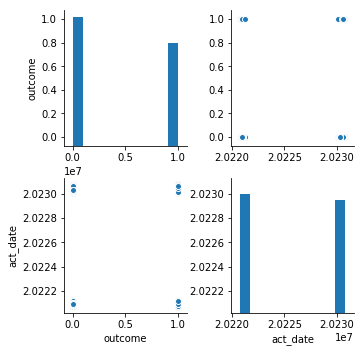

In [16]:
sns.pairplot(df_train_rename)
plt.show()

In [17]:
df_train.tail()

people_id   activity_id        date activity_category char_1 char_2  \
2197286  ppl_99994  act2_4668076  2023-06-16            type 4    NaN    NaN   
2197287  ppl_99994  act2_4743548  2023-03-30            type 4    NaN    NaN   
2197288  ppl_99994   act2_536973  2023-01-19            type 2    NaN    NaN   
2197289  ppl_99994   act2_688656  2023-05-02            type 4    NaN    NaN   
2197290  ppl_99994   act2_715089  2023-06-15            type 2    NaN    NaN   

        char_3 char_4 char_5 char_6 char_7 char_8 char_9    char_10  outcome  
2197286    NaN    NaN    NaN    NaN    NaN    NaN    NaN   type 418        1  
2197287    NaN    NaN    NaN    NaN    NaN    NaN    NaN  type 1832        1  
2197288    NaN    NaN    NaN    NaN    NaN    NaN    NaN     type 1        1  
2197289    NaN    NaN    NaN    NaN    NaN    NaN    NaN   type 199        1  
2197290    NaN    NaN    NaN    NaN    NaN    NaN    NaN     type 1        1

In [18]:
df_train['char_1'].value_counts()

type 2     38030
type 5     34509
type 1     14938
type 12    14917
type 3     12372
type 10     7795
type 7      7312
type 23     2420
type 6      2385
type 11     2333
type 26     2220
type 8      2110
type 17     1778
type 13     1586
type 4      1329
type 15     1284
type 29     1233
type 16     1229
type 9      1225
type 14      990
type 28      706
type 25      694
type 30      653
type 24      641
type 19      491
type 20      434
type 36      397
type 41      278
type 40      214
type 22      211
type 27      199
type 35      180
type 32      146
type 34       66
type 39       63
type 33       60
type 18       57
type 31       54
type 38       12
type 43       11
type 37       10
type 44        8
type 49        6
type 46        6
type 50        5
type 21        5
type 42        4
type 52        3
type 48        3
type 47        2
type 45        1
Name: char_1, dtype: int64

In [19]:
df_train['char_1'].nunique()

51

In [ ]:
# Reference: https://github.com/JihongL/Shelter-Animal-Outcomes/blob/master/Shelter_EDA.ipynb
def numeric_label(x):
    if x == 'type 1':
        return 1
    elif x == 'type 2':
        return 2

In [ ]:
def value_convert_str_to_int(data, column, drop_step):
    column_use = list(data[column])
    column_list = []
    for str_num in column_use:
        for i in range(:
            if i == 
    

# 분석의 설계
* dataset의 구조를 분석해 보았다.
* act_train의 char_1 ~ 9는 activity_category에 따라서 전혀 의미가 없는 경우가 많았다. 
* 이런 상태에서 분석을 돌리는 것은 컴퓨팅자원의 낭비라는 생각이 들어서 의미 없는 혹은 의미가 적은 feature를 줄일 수 없을까 하는 고민을 하게 되었다. 
* 이런 문제의식에서 아래의 차원축소에 관한 실험을 설계하게 되었다.
* 그리고 인터넷으로 검색을 해보니 아래의 레퍼런스를 발견하게 되었다. 
* 개인프로젝트의 방향성을 재정립하였다. 3개의 프로젝트를 통해 학원에서 배운 것을 다 사용하는 것 보다는, 하나의 프로젝트를 진행하면서 내가 부딪친 문제. 그리고 이를 해결하기 위한 노력. 그 과정에서 논문이나 다큐멘테이션을 분석하고 적용하며 비교하는 작업. 이것들을 보여주는 것이 분석가로서의 나의 모습을 부각시킬 수 있을 것으로 보인다. 그래서 하이어링데이까지의 개인프로젝트는 이 redhat하나만 하기로 하고, 이하의 레퍼런스들을 비롯해서 분석도구들을 파해치고 이해하는 방향으로 잡아보겠다.

# 차원 축소에 관한 실험
1) 전체 column으로 분석 수행
2) people_id를 인덱스로 해서 people 만으로 predict_proba 산출해서 그 값(people_proba)을 act_train에 merge해서 분석 수행
3) 2)에서 act_train의 의미 없다고 여겨지는 column들을 제거하고, people_id, people_proba, act_category, char_10, outcome 만으로 분석 수행

위의 3가지 경우의 auc를 비교해서 차원축소의 효과에 대해서 분석하는 것.

2-1) act_train dataset에서 각 people_id가 하나의 outcome 값만 가지는지 확인 필요
2-2) people dataset에서 각 column의 구조와 설명변수로서의 의미에 대해서 분석. 살릴지 죽일지 판단하기 위해.

3-1) char_1 ~ 9 의 각 column의 구조와 설명변수로서의 의미에 대해서 분석 필요. 살릴지 죽일지 판단하기 위해.